In [1]:
## Import the required python libraries:

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Read the dataset ('bank-full.csv') to variable df:

df = pd.read_csv('bank-full.csv')

In [2]:
#lets have a look at the first few datapoints:

(df.head(5))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
(df.tail(5))

#Eyeballing the dataset shows us no null values

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
print(df.shape) ## Shape of the dataset
print(df.info()) ## Info on the Dtype in the dataset

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


#### print(df.describe())

## Here the descriptions gives us few insights such as distribution of numerical features like 'balance'
## Summary suggests that:

## - For "balance": Median is further from which means its right skewed distributed. 
## - For "balance": IQR here also suggest we have a lot of outliers 


D:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

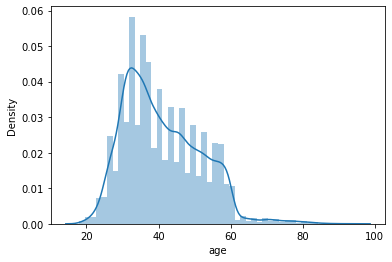

In [6]:
## Lets have a look at the distribution to confirm our inference 

sns.distplot(df['age'])

D:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

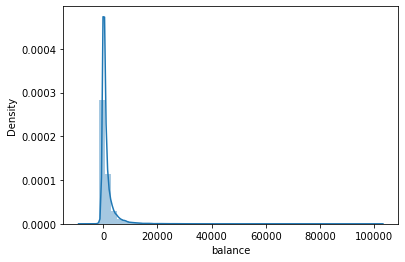

In [7]:
sns.distplot(df['balance'])

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

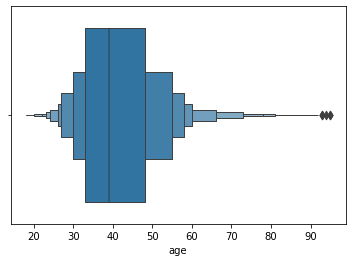

In [8]:
#Lets check for outliers

sns.boxenplot(df['age']) #Not many outliers

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

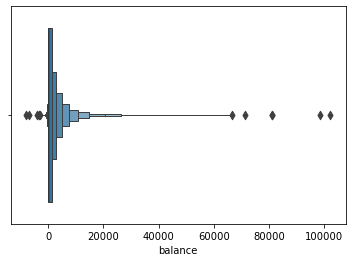

In [9]:
sns.boxenplot(df['balance']) ## We can see because of outlier it is very positively skewed

In [10]:
## Lets see if we have any null value in the dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
## Understanding the class distribution of target variable 

df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

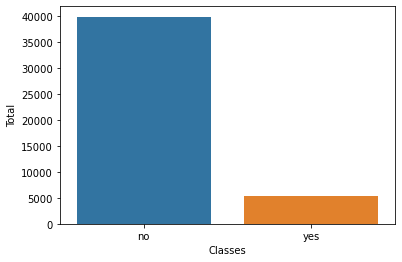

In [12]:
## Visualization of class distribution of target variable 
sns.barplot(x= df['y'].unique(),y=df['y'].value_counts())
plt.xlabel('Classes')
plt.ylabel('Total')
plt.show()

In [13]:
df.drop(['contact','month'], axis=1, inplace=True)

In [14]:
## Treatiing outliers in 'balance'

upper_lim = df['balance'].quantile(.95)
lower_lim = df['balance'].quantile(.05)

data = df[(df['balance'] < upper_lim) & (df['balance'] > lower_lim)]

In [15]:
conditions = [
    data['education'].str.contains('tertiary'),
    data['education'].str.contains('secondary'),
    data['education'].str.contains('primary'),
 data['education'].str.contains('unknown')]
choice= [12, 8, 5, 3]

data['educ_bin'] = np.select(conditions, choice, default='unknown')

<ipython-input-15-161be9f9dd3a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['educ_bin'] = np.select(conditions, choice, default='unknown')


In [16]:
data #Dataset ready to be encoded

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,y,educ_bin
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,unknown,no,12
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,unknown,no,8
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,unknown,no,8
3,47,blue-collar,married,unknown,no,1506,yes,no,5,92,1,-1,0,unknown,no,3
4,33,unknown,single,unknown,no,1,no,no,5,198,1,-1,0,unknown,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,977,3,-1,0,unknown,yes,12
45207,71,retired,divorced,primary,no,1729,no,no,17,456,2,-1,0,unknown,yes,5
45208,72,retired,married,secondary,no,5715,no,no,17,1127,5,184,3,success,yes,8
45209,57,blue-collar,married,secondary,no,668,no,no,17,508,4,-1,0,unknown,no,8


In [17]:
enconded_set= pd.get_dummies(data, drop_first=True)

In [18]:
enconded_set

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,y_yes,educ_bin_3,educ_bin_5,educ_bin_8
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,1,0,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
x= enconded_set.drop('y_yes', axis=1)
y= enconded_set['y_yes']

In [20]:
from sklearn.model_selection import train_test_split ## Import train_test_split function
from sklearn import metrics                          ## Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier() ## Instanciate the algorithm

In [23]:
## Spliting data in train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # 70% training and 30% test


In [24]:
dt = dt.fit(X_train,y_train)


In [25]:
y_pred = dt.predict(X_test)


In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8541461815798099


In [28]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.6571955970036502, 0.6655417558293979, 0.6611772157371621, None)

In [29]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.8541461815798099, 0.8541461815798099, 0.8541461815798099, None)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[9817,  935],
       [ 845,  607]], dtype=int64)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     10752
           1       0.39      0.42      0.41      1452

    accuracy                           0.85     12204
   macro avg       0.66      0.67      0.66     12204
weighted avg       0.86      0.85      0.86     12204



In [32]:
data.shape

(40678, 16)

In [33]:
data['y'].value_counts()

no     35859
yes     4819
Name: y, dtype: int64

In [34]:
percent_target= print('no',(35859/40678*100,'%'), 'yes',(4819/40678*100,'%'))

no (88.15330153891539, '%') yes (11.846698461084616, '%')


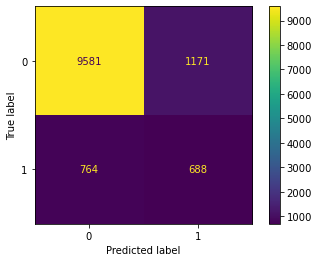

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test)

In [65]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

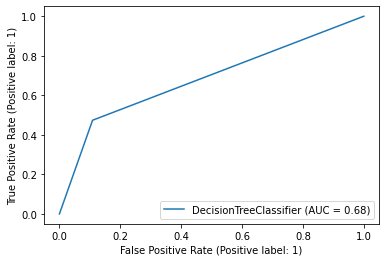

In [67]:
metrics.plot_roc_curve(dt,X_test, y_test)
plt.show() 

from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(data.drop('Class', axis=1), credit_df['Class'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns

In [38]:
data

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,y,educ_bin
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,unknown,no,12
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,unknown,no,8
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,unknown,no,8
3,47,blue-collar,married,unknown,no,1506,yes,no,5,92,1,-1,0,unknown,no,3
4,33,unknown,single,unknown,no,1,no,no,5,198,1,-1,0,unknown,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,977,3,-1,0,unknown,yes,12
45207,71,retired,divorced,primary,no,1729,no,no,17,456,2,-1,0,unknown,yes,5
45208,72,retired,married,secondary,no,5715,no,no,17,1127,5,184,3,success,yes,8
45209,57,blue-collar,married,secondary,no,668,no,no,17,508,4,-1,0,unknown,no,8


In [39]:
from collections import Counter

In [40]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before', counter)
#oversampling the train dataset using SMOTE
smt= SMOTE()

X_train, y_train_sm= smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 25107, 1: 3367})
After Counter({0: 25107, 1: 25107})


In [43]:
dt.fit(X_train, y_train_sm)

DecisionTreeClassifier()

In [44]:
y_pred_smote= dt.predict(X_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote))


Accuracy: 0.8414454277286135


In [46]:
precision_recall_fscore_support(y_test, y_pred_smote, average='macro')

(0.6481196722747825, 0.6824596154319166, 0.6619326069010859, None)

In [63]:
precision_recall_fscore_support(y_test, y_pred_smote, average='micro')

(0.8414454277286135, 0.8414454277286135, 0.8414454277286135, None)

In [64]:
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10752
           1       0.37      0.47      0.42      1452

    accuracy                           0.84     12204
   macro avg       0.65      0.68      0.66     12204
weighted avg       0.86      0.84      0.85     12204



In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()

In [50]:
rfc.fit(X_train,y_train_sm)

RandomForestClassifier()

In [51]:
randfor= rfc.predict(X_test)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, randfor))

Accuracy: 0.8871681415929203


In [53]:
precision_recall_fscore_support(y_test, randfor, average='macro')

(0.728866949197707, 0.698877087637741, 0.7122565067584306, None)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, randfor)

array([[10171,   581],
       [  796,   656]], dtype=int64)

In [61]:
print(classification_report(y_test,randfor))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10752
           1       0.53      0.45      0.49      1452

    accuracy                           0.89     12204
   macro avg       0.73      0.70      0.71     12204
weighted avg       0.88      0.89      0.88     12204



In [54]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

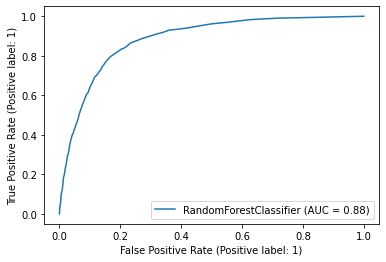

In [55]:
metrics.plot_roc_curve(rfc,X_test, y_test)
plt.show() 

In [37]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [81]:
df.groupby['age']['balance'].mean()

TypeError: 'method' object is not subscriptable

In [ ]:
.mean